## MNIST Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',version=1)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
some_data = X.iloc[0]
some_data_img = some_data.values.reshape(28,28)

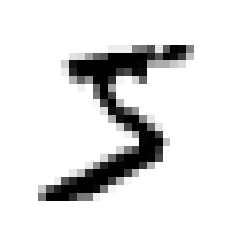

In [8]:
plt.imshow(some_data_img, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [9]:
X.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [10]:
y[0]

'5'

In [11]:
import numpy as np

In [12]:
y = y.astype(np.uint8)

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In [14]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_data])

C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance

cross validation

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [20]:
from sklearn.base import BaseEstimator

In [21]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [22]:
nev_clf = Never5Classifier()
cross_val_score(nev_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [25]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

## Precision and Recall

In [26]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [27]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [28]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

## Precision recall Trade off

In [29]:
y_scores = sgd_clf.decision_function([some_data])

C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [30]:
y_scores

array([2164.22030239])

In [31]:
threshold = 0
y_some_digit_prep = (y_scores > threshold)
y_some_digit_prep

array([ True])

In [32]:
threshold = 8000
y_some_digit_prep = (y_scores > threshold)
y_some_digit_prep

array([False])

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

#### Precision recall curve

In [34]:
from sklearn.metrics import precision_recall_curve

In [35]:
precision, recall, threshold = precision_recall_curve(y_train_5, y_scores)

In [36]:
def plot_precision_recall_VS_threshold(precision, recall, threshold):
    plt.figure(figsize=(12,5))
    plt.plot(threshold, precision[:-1], "b--", label="Precision")
    plt.plot(threshold, recall[:-1], "g-", label="Recall")
    plt.legend()
    plt.grid(visible=True) 
    plt.xlabel('Threshold',fontdict={'size' : 16})
    plt.axvline()

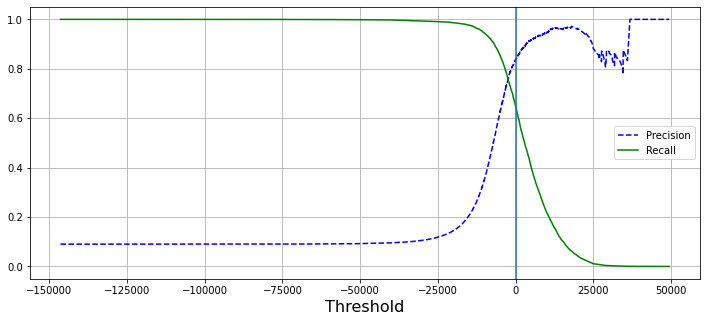

In [37]:
plot_precision_recall_VS_threshold(precision, recall, threshold)
plt.show()

## ROC Curve

In [38]:
from sklearn.metrics import roc_curve

In [39]:
fpr ,tpr ,thresholds = roc_curve(y_train_5,y_scores)

In [40]:
def plot_roc_curve(fpr ,tpr ,thresholds):
    plt.figure(figsize=(10,8))
    plt.plot(fpr,tpr,linewidth=2)
    plt.plot([0,1],[0,1],'k--')
    plt.grid(visible=True)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

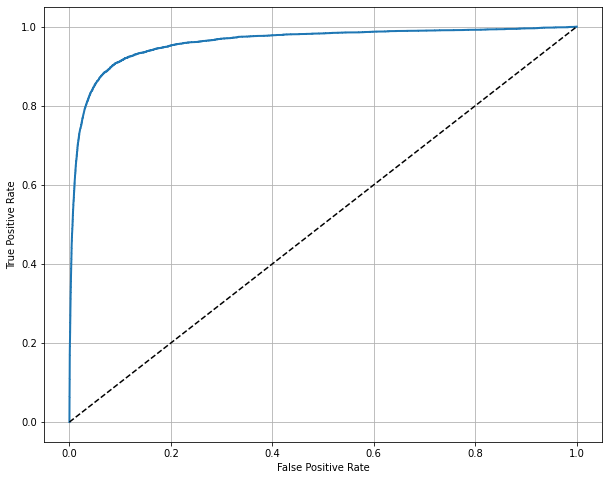

In [41]:
plot_roc_curve(fpr,tpr,threshold)
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

In [43]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Compare Random forest classifier and sgd_clf

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method = 'predict_proba')

In [46]:
y_scores_forest = y_probas_forest[:, 1]
y_scores_forest

array([0.86, 0.03, 0.02, ..., 1.  , 0.09, 0.1 ])

In [47]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


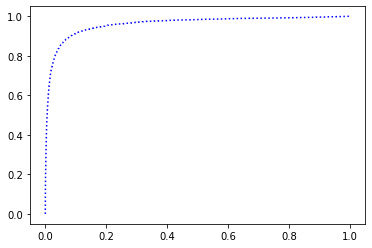

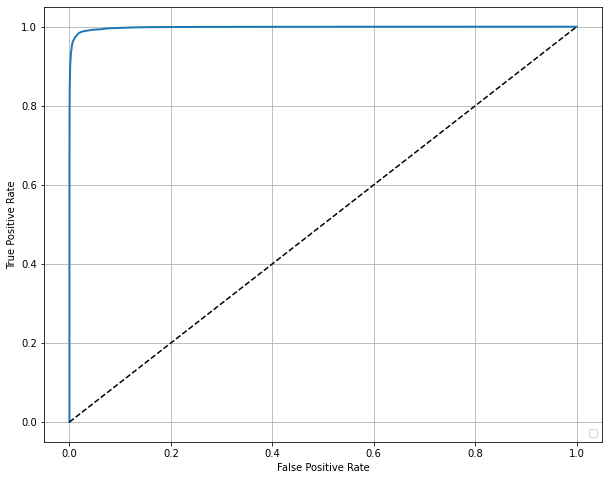

In [48]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [49]:
roc_auc_score(y_train_5, y_scores_forest)

0.9982111888171495

## Multiclass CLasification

In [50]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [51]:
sgd_clf.predict([some_data])

C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [52]:
some_data_score = sgd_clf.decision_function([some_data])

C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [53]:
some_data_score

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [54]:
np.argmax(some_data_score)

3

In [55]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [56]:
sgd_clf.classes_[5]

5

In [57]:
from sklearn.multiclass import OneVsOneClassifier

In [58]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [59]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [60]:
ovo_clf.predict([some_data])

C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [61]:
len(ovo_clf.estimators_)

45

In [62]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_data])

C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [63]:
forest_clf.predict_proba([some_data])

C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.04, 0.05, 0.  , 0.87, 0.  , 0.03, 0.01, 0.  ]])

In [64]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

#### We can increase the accuracy by scaling

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
x_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

## Error analysis

In [68]:
y_prep = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)

In [70]:
conf_mx = confusion_matrix(y_train, y_prep)

In [71]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

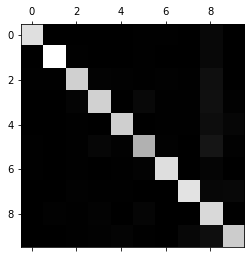

In [72]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [73]:
row_sum = conf_mx.sum(axis=1, keepdims=True)

In [74]:
row_conf_mx = conf_mx/row_sum

In [75]:
np.fill_diagonal(row_conf_mx, 0)

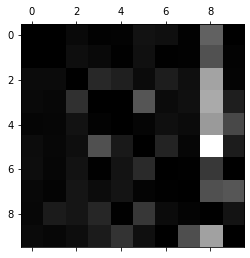

In [76]:
plt.matshow(row_conf_mx, cmap=plt.cm.gray)
plt.show()

## Multiclass classification

In [81]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [82]:
knn_clf.predict([some_data])

C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [83]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [84]:
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

## Multioutput Classification

In [88]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [102]:

knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict(X_test_mod)
